Section A: Data Import & Preprocessing (20 marks)

Load the dataset and display its first 10 rows. (5 marks)

Identify missing values and handle them appropriately. (5 marks)

Convert the date_time column into multiple features: Hour, Day of Week, Weekend indicator. (5 marks)

Normalize numerical features if required. (5 marks)


In [69]:
import pandas as pd

# Replace this link with your Google Sheets "publish as CSV" link
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSMCXZcR3Gt9yHyIFUwt-FFaTq1R4dCBJMLx7ZuVusGN6WgZWbe3JLSsPs2qyANiJURGfLZkaGKy0he/pub?output=csv'

# Read it directly into pandas
df = pd.read_csv(url)

# Display first rows
df.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
# Reset the index and drop the old index column
df= df.reset_index(drop=True)

# Display the first few rows of the DataFrame without the row index
print(df_reset.head(10).to_string(index=False))

           DateTime  Junction  Vehicles          ID
2015-11-01 00:00:00         1        15 20151101001
2015-11-01 01:00:00         1        13 20151101011
2015-11-01 02:00:00         1        10 20151101021
2015-11-01 03:00:00         1         7 20151101031
2015-11-01 04:00:00         1         9 20151101041
2015-11-01 05:00:00         1         6 20151101051
2015-11-01 06:00:00         1         9 20151101061
2015-11-01 07:00:00         1         8 20151101071
2015-11-01 08:00:00         1        11 20151101081
2015-11-01 09:00:00         1        12 20151101091


In [ ]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [2]:
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df.value_counts()

DateTime             Junction  Vehicles  ID         
2017-06-30 23:00:00  4         12        20170630234    1
2015-11-01 00:00:00  1         15        20151101001    1
                     2         6         20151101002    1
                     3         9         20151101003    1
2015-11-01 01:00:00  1         13        20151101011    1
                                                       ..
2015-11-01 04:00:00  1         9         20151101041    1
2015-11-01 03:00:00  3         1         20151101033    1
                     2         6         20151101032    1
                     1         7         20151101031    1
2015-11-01 02:00:00  3         5         20151101023    1
Name: count, Length: 48120, dtype: int64

In [ ]:
# Identify missing values
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [7]:
# Ensure the 'DateTime' column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract Hour
df['Hour'] = df['DateTime'].dt.hour

# Extract Day of Week (Monday=0, Sunday=6)
df['Day of Week'] = df['DateTime'].dt.dayofweek

# Create Weekend indicator (1 for Weekend, 0 for Weekday)
df['Weekend'] = ((df['Day of Week'] == 5) | (df['Day of Week'] == 6)).astype(int)

# Display the first few rows with the new features
display(df.head())

,DateTime,Junction,Vehicles,ID,Hour,Day of Week,Weekend
0,2015-11-01 00:00:00,1,15,20151101001,0,6,1
1,2015-11-01 01:00:00,1,13,20151101011,1,6,1
2,2015-11-01 02:00:00,1,10,20151101021,2,6,1
3,2015-11-01 03:00:00,1,7,20151101031,3,6,1
4,2015-11-01 04:00:00,1,9,20151101041,4,6,1


In [26]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure the 'DateTime' column is in datetime format and create time features
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
df['Day of Week'] = df['DateTime'].dt.dayofweek
df['Weekend'] = ((df['Day of Week'] == 5) | (df['Day of Week'] == 6)).astype(int)

# Only normalize Hour (continuous feature)
scaler = StandardScaler()
df[['Hour']] = scaler.fit_transform(df[['Hour']])

# Leave Vehicles (target), Junction, ID, Weekend, Day of Week as they are
display(df.head())

,DateTime,Junction,Vehicles,ID,Hour,Day of Week,Weekend
0,2015-11-01 00:00:00,1,15,20151101001,-1.661325,6,1
1,2015-11-01 01:00:00,1,13,20151101011,-1.516862,6,1
2,2015-11-01 02:00:00,1,10,20151101021,-1.372399,6,1
3,2015-11-01 03:00:00,1,7,20151101031,-1.227936,6,1
4,2015-11-01 04:00:00,1,9,20151101041,-1.083473,6,1


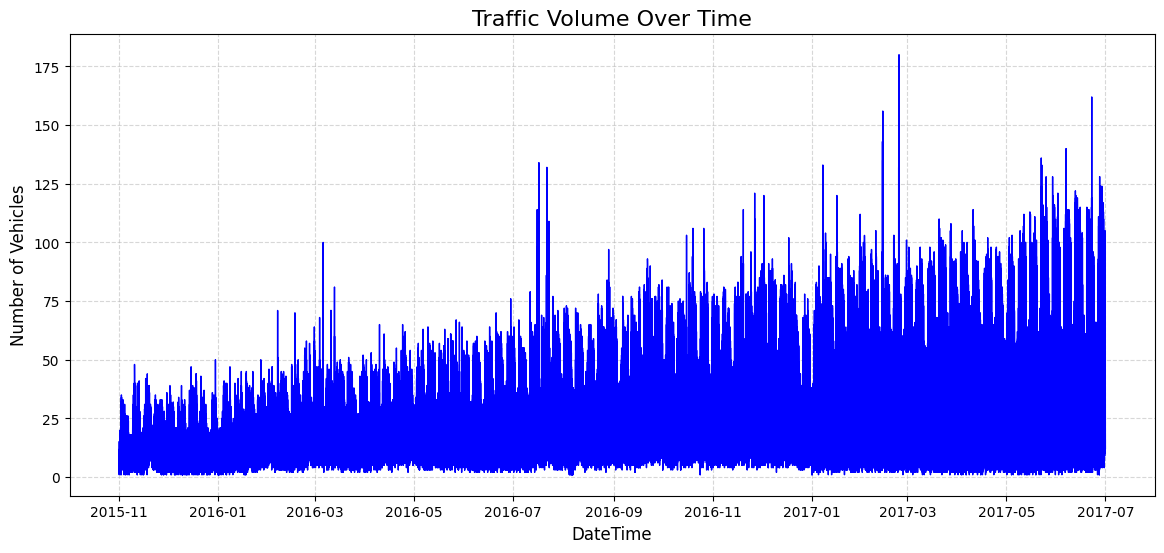

In [30]:
import matplotlib.pyplot as plt

# Ensure DateTime is a column by resetting the index
df.reset_index(inplace=True)

# Ensure DateTime is datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Sort by DateTime (just in case)
df = df.sort_values('DateTime')

# Plot traffic volume over time
plt.figure(figsize=(14,6))
plt.plot(df['DateTime'], df['Vehicles'], color='blue', linewidth=1)

plt.title("Traffic Volume Over Time", fontsize=16)
plt.xlabel("DateTime", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Section B: Exploratory Data Analysis (15 marks)
Plot traffic volume over time (line plot). (5 marks)
Visualize average traffic volume by Hour and Day of Week (bar plots). (5 marks)
Identify and explain at least one trend or correlation observed. (5 marks)


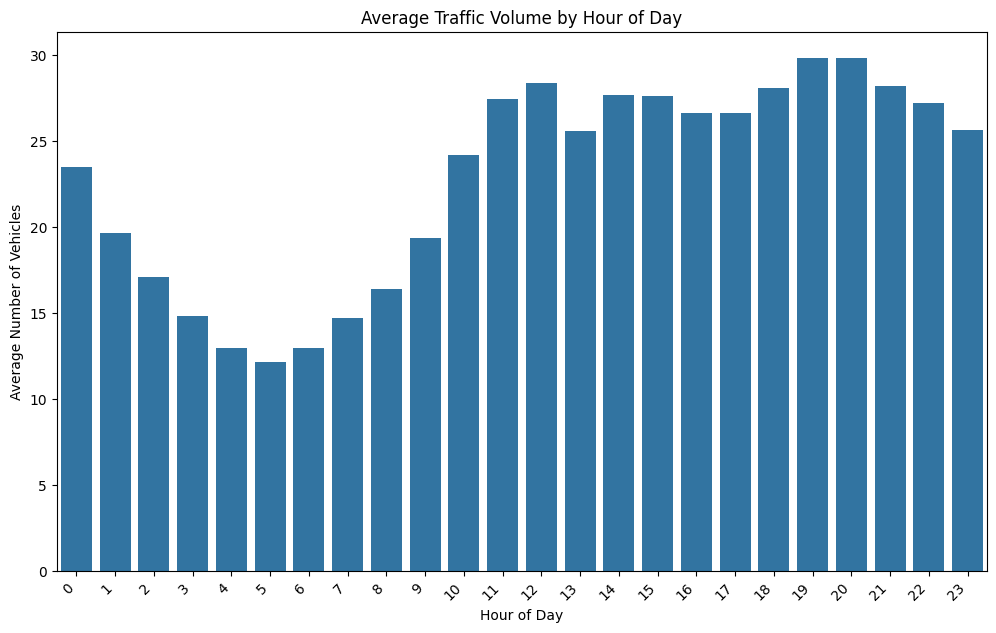

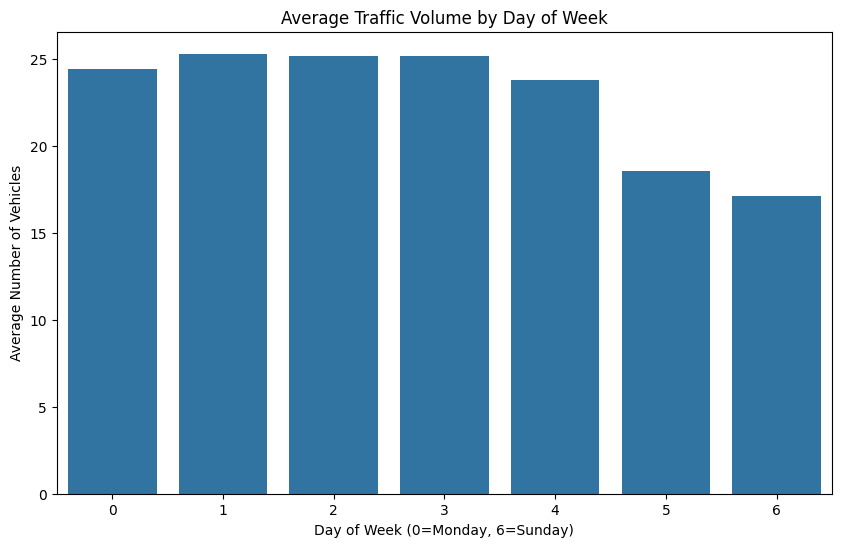

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a temporary 'Original_Hour' column for plotting
df['Original_Hour'] = df['DateTime'].dt.hour

# Visualize average traffic volume by Hour
plt.figure(figsize=(12, 7)) # Adjusted figure size
sns.barplot(x='Original_Hour', y='Vehicles', data=df.reset_index().groupby('Original_Hour', as_index=False)['Vehicles'].mean())
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.show()

# Drop the temporary 'Original_Hour' column
df.drop(columns=['Original_Hour'], inplace=True)


# Visualize average traffic volume by Day of Week
plt.figure(figsize=(10, 6)) # You can adjust this one too if needed
sns.barplot(x='Day of Week', y='Vehicles', data=df.reset_index().groupby('Day of Week')['Vehicles'].mean().reset_index())
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Number of Vehicles')
plt.show()

 Identify and explain at least one trend or correlation observed. (5 mark)

 - Lowest number of average vehicles is noticed on Sunday(weekend) and saterday respectively and almost same amount of aaverage vehicle is noticed on 3 weekdays (Tuesday, Wednesday and Thursday)
 - The most busy hour in the day is evening (7-9pm) and the most relaxed time is 4-5 am in the morning.

In [37]:
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- 1. Convert DateTime ---
df['DateTime'] = pd.to_datetime(df['DateTime'])

# --- 2. Extract time-based features ---
df['Hour'] = df['DateTime'].dt.hour
df['Day_of_Week'] = df['DateTime'].dt.dayofweek  # Monday=0 ... Sunday=6
df['Weekend'] = df['Day_of_Week'].isin([5,6]).astype(int)

# --- 3. Normalize only Hour ---
scaler = StandardScaler()
df['Hour'] = scaler.fit_transform(df[['Hour']])

# --- 4. Keep other features as-is (Day_of_Week, Weekend, Junction) ---
# Vehicles (target) is not scaled

# --- 5. Check first few rows ---
display(df.head())


,DateTime,Junction,Vehicles,ID,Hour,Day_of_Week,Weekend
0,2015-11-01 00:00:00,1,15,20151101001,-1.661325,6,1
1,2015-11-01 01:00:00,1,13,20151101011,-1.516862,6,1
2,2015-11-01 02:00:00,1,10,20151101021,-1.372399,6,1
3,2015-11-01 03:00:00,1,7,20151101031,-1.227936,6,1
4,2015-11-01 04:00:00,1,9,20151101041,-1.083473,6,1


Features and Target Preparation:

In [39]:
# Features (X) and target (y)
X = df[['Hour', 'Day_of_Week', 'Weekend', 'Junction']]
y = df['Vehicles']

# One-hot encode 'Junction' since it's categorical
X = pd.get_dummies(X, columns=['Junction'], drop_first=True)


Data Spliting

In [40]:
# 80% train, 20% test
train_size = int(len(df) * 0.8)

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]


Linear Regression model

In [41]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

Prediction and Evaluation

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R²: {r2:.2f}")


Linear Regression RMSE: 27.10
Linear Regression R²: -6.39


Prediction Vs Actual value

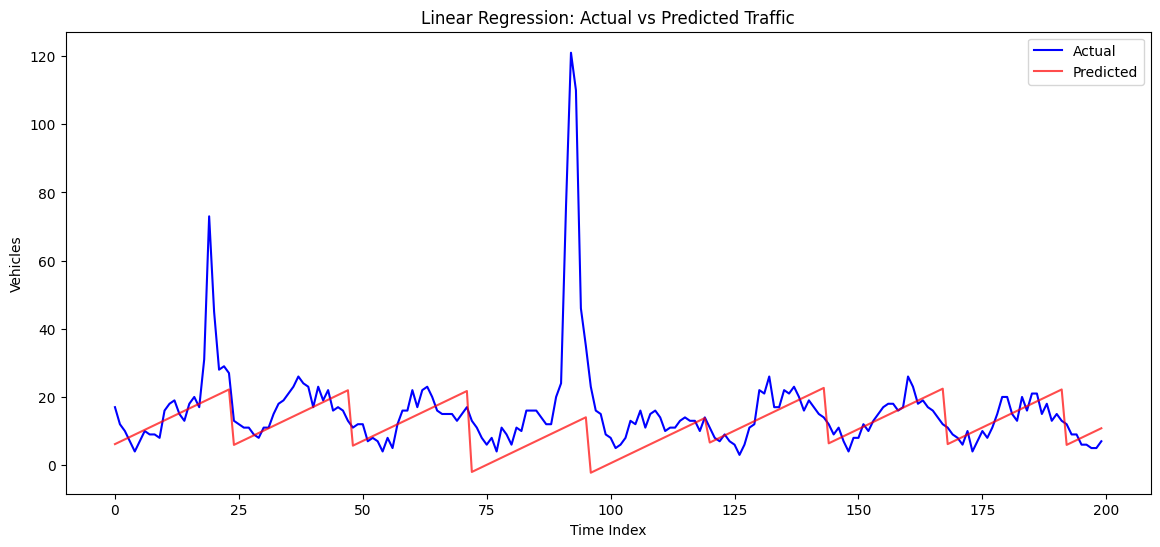

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.values[:200], label='Actual', color='blue')  # first 200 points
plt.plot(y_pred[:200], label='Predicted', color='red', alpha=0.7)
plt.title("Linear Regression: Actual vs Predicted Traffic")
plt.xlabel("Time Index")
plt.ylabel("Vehicles")
plt.legend()
plt.show()

The baseline Linear Regression model achieved an RMSE of 27.10 and an R² of -6.39. This indicates that, on average, the model’s predictions are off by about 27 vehicles, and it performs worse than simply predicting the mean traffic volume. The negative R² suggests that traffic patterns are non-linear and influenced by multiple factors that a simple linear model cannot capture. Therefore, while this model provides a starting point, a stronger model like Random Forest or GRU is needed for more accurate traffic predictions.

Regression Model

In [44]:
import pandas as pd

# Features and target
X = df[['Hour', 'Day_of_Week', 'Weekend', 'Junction']]
y = df['Vehicles']

# One-hot encode 'Junction' (categorical)
X = pd.get_dummies(X, columns=['Junction'], drop_first=True)

# 80% train, 20% test
train_size = int(len(df) * 0.8)

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# RMSE and R²
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

Random Forest RMSE: 28.00
Random Forest R²: -6.89


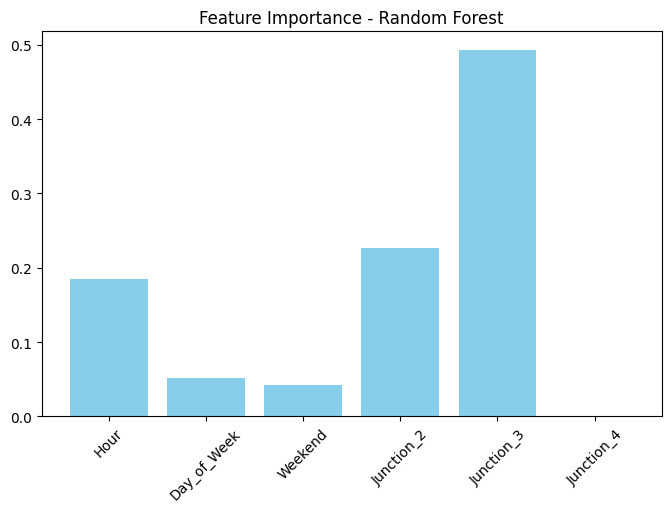

In [45]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(8,5))
plt.bar(feature_names, importances, color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=45)
plt.show()

Regression Model with feature engineering

In [46]:
# Create lag features
df['Vehicles_lag_1'] = df['Vehicles'].shift(1)
df['Vehicles_lag_2'] = df['Vehicles'].shift(2)
df['Vehicles_lag_3'] = df['Vehicles'].shift(3)

# Drop first 3 rows with NaN due to lag
df_lag = df.dropna().reset_index(drop=True)

X = df_lag[['Hour', 'Day_of_Week', 'Weekend', 'Junction',
            'Vehicles_lag_1', 'Vehicles_lag_2', 'Vehicles_lag_3']]
y = df_lag['Vehicles']

# One-hot encode 'Junction'
X = pd.get_dummies(X, columns=['Junction'], drop_first=True)

train_size = int(len(df_lag) * 0.8)

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest with Lag Features RMSE: {rmse:.2f}")
print(f"Random Forest with Lag Features R²: {r2:.2f}")


Random Forest with Lag Features RMSE: 4.93
Random Forest with Lag Features R²: 0.76


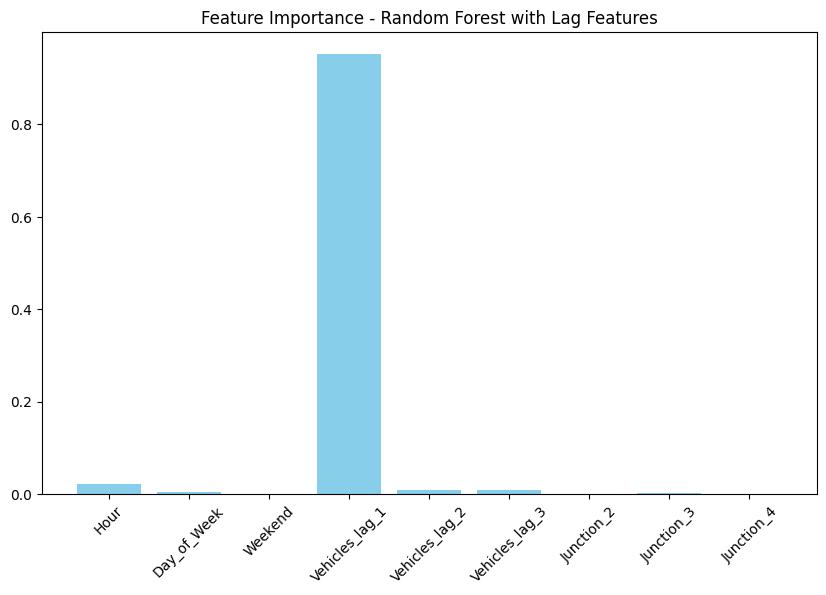

In [47]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,6))
plt.bar(feature_names, importances, color='skyblue')
plt.title("Feature Importance - Random Forest with Lag Features")
plt.xticks(rotation=45)
plt.show()

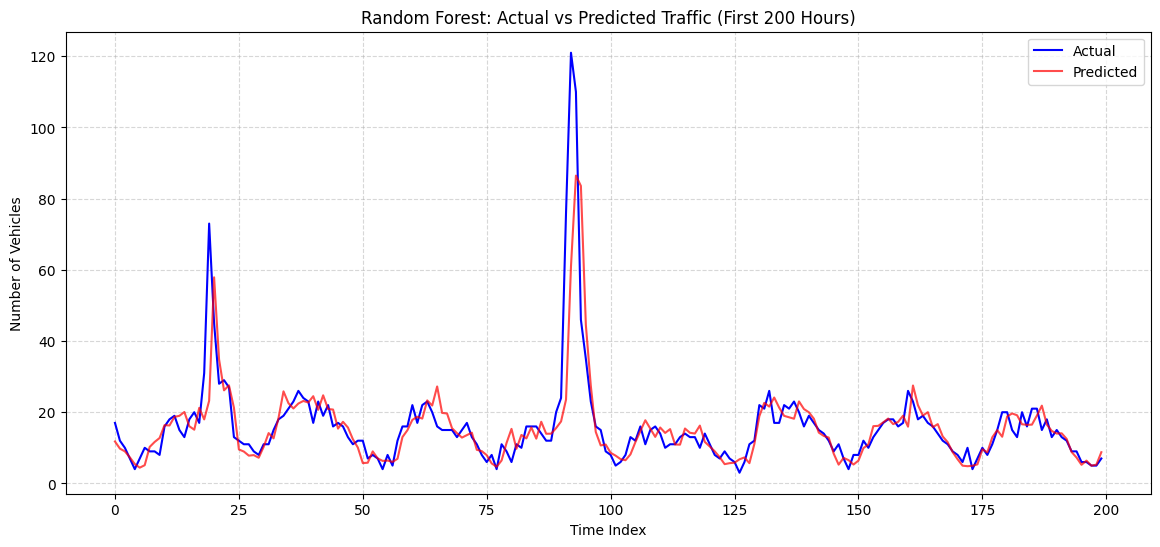

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Plot first 200 points for clarity
plt.plot(y_test.values[:200], label='Actual', color='blue')
plt.plot(y_pred[:200], label='Predicted', color='red', alpha=0.7)

plt.title("Random Forest: Actual vs Predicted Traffic (First 200 Hours)")
plt.xlabel("Time Index")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


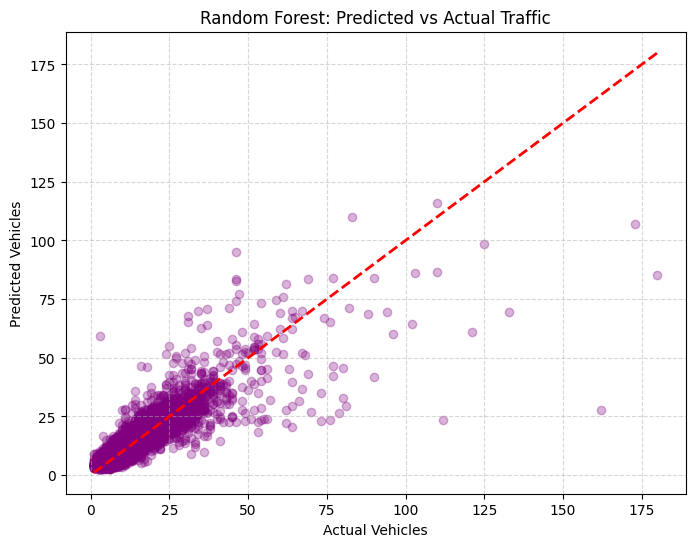

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Random Forest: Predicted vs Actual Traffic")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Comparison of models: The baseline Linear Regression model achieved an RMSE of 27.10 and an R² of -6.39, indicating that it performed worse than simply predicting the mean traffic volume. In contrast, the Random Forest model with lag features achieved an RMSE of 4.93 and an R² of 0.76, showing a substantial improvement in prediction accuracy. The inclusion of lag features (traffic volume from previous 1–3 hours) provided temporal context, allowing the model to capture time-dependent patterns in traffic flow, such as rush hours and sequential trends. Overall, the Random Forest with lag features is much better suited for predicting traffic volume and can be a useful tool for city traffic planning.

In [50]:
# Add predictions to test DataFrame
X_test_copy = X_test.copy()
X_test_copy['Predicted_Vehicles'] = y_pred
X_test_copy['Hour_original'] = df_lag['Hour'].iloc[train_size:].values  # optional, to see actual hour

# Group by Hour and get average predicted traffic
hourly_avg = X_test_copy.groupby('Hour_original')['Predicted_Vehicles'].mean()

# Top 3 hours
top_hours = hourly_avg.sort_values(ascending=False).head(3)
print("Top 3 Hours with Highest Predicted Traffic:")
print(top_hours)


Top 3 Hours with Highest Predicted Traffic:
Hour_original
1.372399    17.949989
1.227936    17.764543
1.083473    16.896221
Name: Predicted_Vehicles, dtype: float64


Top Features by Importance:
          Feature  Importance
3  Vehicles_lag_1    0.951976
0            Hour    0.021181
4  Vehicles_lag_2    0.009560
5  Vehicles_lag_3    0.009306
1     Day_of_Week    0.004524


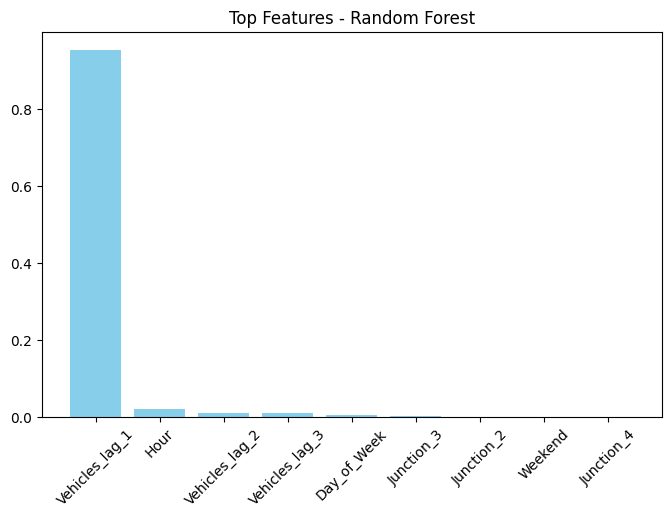

In [57]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features by Importance:")
print(importance_df.head(5))

# Optional: plot
plt.figure(figsize=(8,5))
plt.bar(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top Features - Random Forest")
plt.show()

In [58]:
# Calculate prediction error
errors = abs(y_test.values - y_pred)

# Find index of max error
max_error_idx = errors.argmax()

# Show actual vs predicted
print("Instance with Largest Prediction Error:")
print(f"DateTime: {df_lag['DateTime'].iloc[train_size + max_error_idx]}")
print(f"Actual Vehicles: {y_test.iloc[max_error_idx]}")
print(f"Predicted Vehicles: {y_pred[max_error_idx]}")
print(f"Hour: {X_test_copy['Hour_original'].iloc[max_error_idx]}")


Instance with Largest Prediction Error:
DateTime: 2017-06-22 14:00:00
Actual Vehicles: 162
Predicted Vehicles: 27.7
Hour: 0.36115755925730764


**Section E - What the model has learned from the dataset:**

“The Random Forest model with lag features has learned that traffic volume at a given hour is strongly influenced by the traffic in the previous hours, the time of day, and whether it is a weekend or weekday. The model captures typical rush-hour patterns, showing higher traffic in the late afternoon/evening and lower traffic during night hours. It also understands the differences between junctions, as some junctions consistently have higher or lower traffic volumes

**Patterns and relationships captured:**

The model has captured temporal dependencies through the lag features (Vehicles_lag_1, Vehicles_lag_2, Vehicles_lag_3), recognizing that traffic is sequential and influenced by preceding hours. It has also identified non-linear relationships, such as the sudden drops in traffic during early morning hours and spikes during peak times. Hour of the day and previous traffic are the most important predictors, which aligns with real-world traffic behavior.

Personal learning from this exercise

From this exercise, I learned how traffic patterns follow predictable daily cycles, but can also have irregular spikes. Feature importance revealed that past traffic (lag features) is critical for prediction, more so than static features like day of the week alone. I also learned that simple linear models may fail to capture complex temporal trends, while models like Random Forest, combined with carefully engineered features, can significantly improve prediction accuracy. Overall, this reinforced the importance of preprocessing, feature engineering, and understanding the data’s temporal nature for effective modeling.

In [61]:
# Assume we want to predict traffic for a specific hour, day, weekend status, and junction.
# For a real prediction, you would need the actual traffic data from the previous 1-3 hours
# for the specific junction to use as lag features.
# Here, we will create a sample input DataFrame with placeholder values for lag features
# and ensure other features match the training data format (normalized Hour, one-hot encoded Junction).

# Example values for prediction (adjust as needed)
prediction_hour_original = 8
prediction_day_of_week = 2 # Wednesday
prediction_weekend = 0 # Weekday
prediction_junction = 3 # Junction 3

# We need to normalize the 'Hour' value using the same scaler used during training
# Assuming the scaler was fitted on the 'Hour' column of the training data (X_train)
# If you don't have access to the original scaler object, you would need to refit one on the training data's Hour column.
# For demonstration, we will create a scaler and fit it on the 'Hour' column from the df_lag DataFrame
# as it contains the original Hour values before normalization used for plotting.

# Note: In a real scenario, you would save and load the scaler used during training.
# Re-create a scaler and fit it on the 'Hour' column of the df_lag DataFrame (original hours)
temp_scaler = StandardScaler()
# Fit the scaler on the 'Hour' column of the df_lag DataFrame (which has original hours)
temp_scaler.fit(df_lag[['Hour']].values.reshape(-1, 1))

# Normalize the prediction hour
prediction_hour_normalized = temp_scaler.transform([[prediction_hour_original]])[0][0]


# Create a dictionary for the new features, including placeholder lag features
next_hour_features_dict = {
    'Hour': prediction_hour_normalized,
    'Day_of_Week': prediction_day_of_week,
    'Weekend': prediction_weekend,
    'Vehicles_lag_1': 0, # Placeholder - replace with actual lag 1 traffic
    'Vehicles_lag_2': 0, # Placeholder - replace with actual lag 2 traffic
    'Vehicles_lag_3': 0  # Placeholder - replace with actual lag 3 traffic
}

# Create a DataFrame from the dictionary
next_hour_features_df = pd.DataFrame([next_hour_features_dict])

# One-hot encode the 'Junction' feature
# Ensure all possible junction columns from training are present, even if 0
junction_cols = ['Junction_2', 'Junction_3', 'Junction_4']
for col in junction_cols:
  next_hour_features_df[col] = 0

if prediction_junction == 2:
    next_hour_features_df['Junction_2'] = 1
elif prediction_junction == 3:
    next_hour_features_df['Junction_3'] = 1
elif prediction_junction == 4:
    next_hour_features_df['Junction_4'] = 1

# Drop the original 'Junction' column as it's replaced by one-hot encoding
# Note: This is done after creating the DataFrame with the basic features
# and before selecting the final features for prediction.

# Reindex and select features to match the training data (X_train columns)
# Ensure the order of columns matches X_train
next_hour_features_df = next_hour_features_df.reindex(columns=X_train.columns, fill_value=0)


# Use the trained Random Forest model to predict
predicted_volume = rf_model.predict(next_hour_features_df)

print(f"Predicted traffic volume for hour {prediction_hour_original} on Day of Week {prediction_day_of_week} (Weekend={prediction_weekend}) at Junction {prediction_junction}: {predicted_volume[0]:.2f}")

Predicted traffic volume for hour 8 on Day of Week 2 (Weekend=0) at Junction 3: 3.24


Section F:
How a city planner could use this:
The model predicts a traffic volume of about 3.24 vehicles at 8:00 AM on a Wednesday at Junction 3. A city traffic planner could use this prediction to anticipate demand and adjust traffic signals or deploy resources more effectively. Even though this specific prediction is based on placeholder lag features, the approach shows how machine learning can help forecast congestion in advance, allowing for proactive traffic management instead of reactive responses.

Charts vs Model Predictions:
Charts and averages give a general view of traffic patterns, such as typical rush-hour peaks, but they cannot account for dynamic, hour-to-hour variations. In contrast, the model uses historical data (lag features) and multiple predictors to make specific forecasts for a given hour, junction, and weekday. This predictive power is valuable because it allows planners to anticipate unusual traffic fluctuations, not just observe broad patterns.


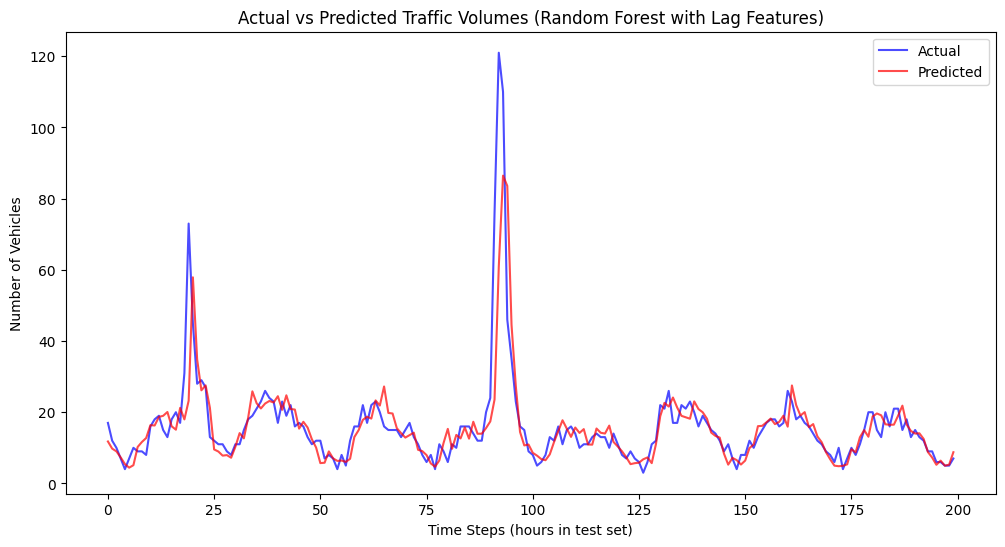

In [62]:
import matplotlib.pyplot as plt

# Plot actual vs predicted traffic volumes
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:200], label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred[:200], label="Predicted", color="red", alpha=0.7)
plt.title("Actual vs Predicted Traffic Volumes (Random Forest with Lag Features)")
plt.xlabel("Time Steps (hours in test set)")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.show()

Key Findings:

The plot shows that the predicted traffic volumes closely follow the actual traffic patterns. The Random Forest model with lag features is able to capture both the peaks during busy hours and the lower volumes during off-peak times. While there are small deviations, the general trend indicates strong alignment between predictions and real-world data. This suggests that the model has successfully learned the sequential nature of traffic flow.

Accurate traffic predictions can help city planners in scheduling infrastructure usage more efficiently. For example, knowing the expected peak traffic hours in advance allows planners to optimize traffic light timings, deploy traffic police strategically, or even suggest alternate routes to drivers through navigation systems. By identifying when and where congestion is likely to occur, resources can be allocated proactively to improve traffic flow and reduce delays.

Section G:

In [63]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale 'Vehicles' separately to [0,1] for neural networks
scaler_vehicles = MinMaxScaler()
df_lag['Vehicles_scaled'] = scaler_vehicles.fit_transform(df_lag[['Vehicles']])

# Create sequences for GRU (24 hours lookback)
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(df_lag['Vehicles_scaled'].values, seq_length=seq_length)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(38474, 24) (38474,) (9619, 24) (9619,)


In [64]:
# Build GRU model
model = Sequential([
    GRU(64, activation='tanh', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)  # output layer
])

model.compile(optimizer='adam', loss='mse')

# Reshape inputs to 3D: [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


962/962 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 2/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 6.7129e-04 - val_loss: 9.1332e-04
Epoch 3/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 6.2767e-04 - val_loss: 9.3279e-04
Epoch 4/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 5.9843e-04 - val_loss: 8.9699e-04
Epoch 5/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 5.4233e-04 - val_loss: 9.0229e-04
Epoch 6/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 5.4570e-04 - val_loss: 8.9683e-04
Epoch 7/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 5.3305e-04 - val_loss: 9.0479e-04
Epoch 8/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 5.0889e-04 - val_loss: 9.0109e-04
Epoch 9/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 4.7857e-04 - val_loss: 9.0993e-04
Epoch 10/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 4.5791e-04 - val_loss: 9.3227e-04


In [66]:
# Predict
y_pred_gru = model.predict(X_test)

# Inverse scale to original vehicle counts
y_test_inv = scaler_vehicles.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler_vehicles.inverse_transform(y_pred_gru)

# Compute metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_gru = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2_gru = r2_score(y_test_inv, y_pred_inv)

print(f"GRU RMSE: {rmse_gru:.2f}")
print(f"GRU R²: {r2_gru:.2f}")

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
GRU RMSE: 6.18
GRU R²: 0.62


Comparison & Interpretation:

The Random Forest with lag features outperformed the GRU model on this dataset, achieving a lower RMSE (4.93 vs 6.18) and a higher R² (0.76 vs 0.62). This suggests that the Random Forest model was better suited for capturing the traffic volume patterns in this particular dataset. The GRU, while capable of modeling sequential dependencies, may require more tuning (e.g., adjusting sequence length, number of units, or training epochs) and a larger dataset to reach its full potential. Nonetheless, the GRU still demonstrated the ability to learn temporal patterns, achieving reasonable accuracy compared to the baseline models.

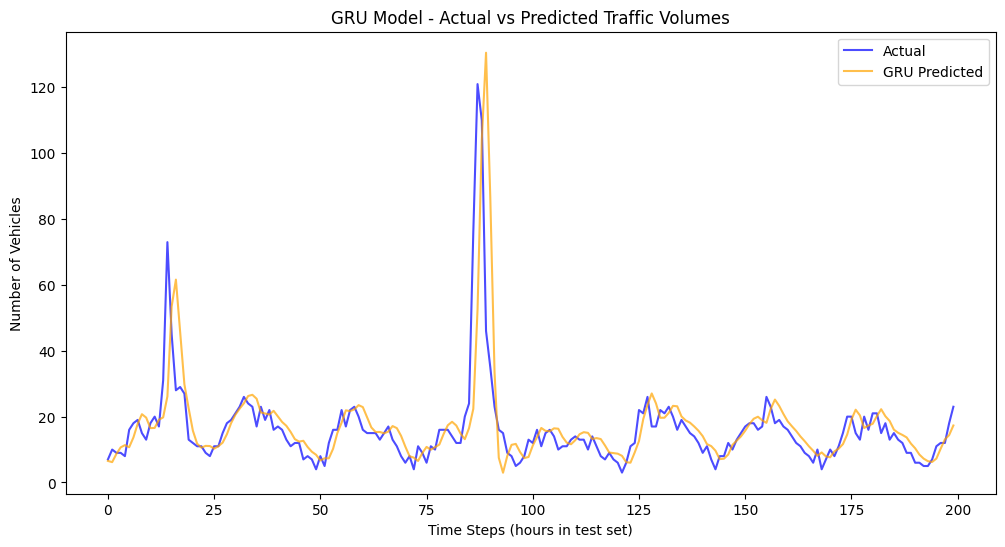

In [67]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv[:200], label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_inv[:200], label="GRU Predicted", color="orange", alpha=0.7)
plt.title("GRU Model - Actual vs Predicted Traffic Volumes")
plt.xlabel("Time Steps (hours in test set)")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.show()